# Machine Learning Classification Model

In [ ]:
???

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
...,...,...
2023-03-14,UP,DOWN
2023-03-15,UP,UP


## Load the data

In [2]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2024-05-31,416.750000,416.750000,404.510010,415.130005,47995300,-0.389344,DOWN
2024-06-03,415.529999,416.429993,408.920013,413.519989,17484700,0.612882,UP
2024-06-04,412.429993,416.440002,409.679993,416.070007,14348900,1.872598,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [5]:
target = df.change_tomorrow_direction
explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [6]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier()

### Visualize the model

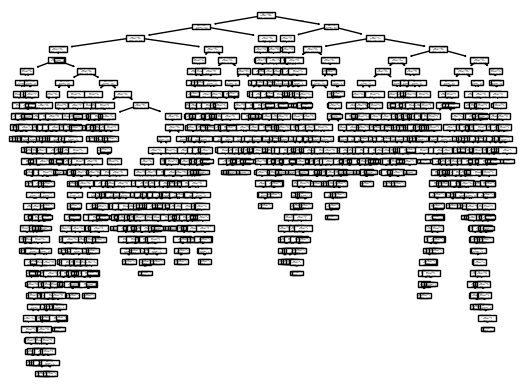

In [7]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [9]:
y_pred = model_dt.predict(X=explanatory)

In [10]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2024-05-31,DOWN,DOWN
2024-06-03,UP,UP
2024-06-04,UP,UP


### Evaluate the model: compare predictions with the reality

In [13]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction
comp.sum()/len(comp)

1.0

In [16]:
model_dt.score(X=explanatory, y=target)

1.0

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [18]:
import pickle

In [20]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)